<a href="https://colab.research.google.com/github/RodrigoLarroca/PortFolio/blob/main/Analysis_Salary_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ANALYSIS AND PREDICTION OF IT SALARIES**

Members: Larroca Rodrigo

This dataset contains job postings from Glassdoor.com from 2017-2018. This dataset includes features such as job title, salary estimate, job description, rating, company name, location, headquarters, size, founded, type of ownership, industry, sector, revenue, competitors compile a list of the most important features in this dataset. , hourly wage minima and maxima,, avg_salary,, num_comp,,sdesc_len If you are looking for a job in the data science field then this is the dataset for you to explore!


*   job_id: The unique identifier for the job posting (Numeric)
*   Job Title
*   job_state: The state where the job is located (String)
*   Salary Estimate
*   Job Description
*   Rating
*   same_state: A binary indicator of whether the job is in the same state as the person looking at the job (String)
*   Company Name
*   age: The age of the person looking at the job (Numeric)
*   Location
*   Headquarters
*   Size
*   Founded
*   Type of ownership
*   Industry
*   Sector
*   Revenue
*   hourly
*   employer_provided
*   min_salary
*   max_salary
*   avg_salary
*   company_txt
*   python_yn: A binary indicator of whether the person looking at the job knows Python (String)
*   R_yn: A binary indicator of whether the person looking at the job knows R (String)
*   spark: A binary indicator of whether the person looking at the job knows Spark (String)
*   aws: A binary indicator of whether the person looking at the job knows AWS (String)
*   excel: A binary indicator of whether the person looking at the job knows Excel (String)
*   Competitors: T competitors for the job (Numeric)













																			

Analytical Context: Analyzing IT salaries by state can provide valuable insight into salary trends in different geographic areas and how they vary from one another. This can be useful for understanding labor market dynamics in the IT sector.

Business Context: IT salary data by state can be used to make strategic decisions about salaries and job openings in a company, or to identify business opportunities in specific geographic areas where salaries are lower.

Business problem: A business problem could be that a company is paying higher than average wages in a certain region, which could affect its ability to compete for talent and increase costs.

Hypothesis: One hypothesis could be that IT wages in certain states are significantly higher due to a higher demand for workers with specific skills in that region. Through the analysis of the data, this hypothesis could be confirmed or refuted and it could be determined if there are other variables that affect IT salaries in those states.

Work done based on:
Predicción Salarial REMAKE
BENITO DE LA TORRE 
https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor

# **Libraries and data**

In [ ]:
!pip install lazypredict
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
import plotly.express as px
import json
import decimal
from decimal import Decimal
from numpy import int64
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
import imblearn
import statsmodels.formula.api as sm
import statsmodels.api as sm
from collections import Counter
from lazypredict.Supervised import LazyClassifier
from imblearn.over_sampling import SMOTEN
from datetime import datetime
from pandas.api.types import is_numeric_dtype
from scipy import stats
from xgboost import XGBClassifier
from sklearn.decomposition import PCA         
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import OneHotEncoder   
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, auc, roc_auc_score 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV 
from sklearn.decomposition import TruncatedSVD 
from sklearn.pipeline import Pipeline
from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from collections import Counter


%matplotlib inline
plt.style.use('ggplot')
sns.set(style="darkgrid")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
salaryd = data = pd.read_csv('salary_data_cleaned.csv')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
salaryd.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research\n,NM,0,47,1,0,0,0,1


# **Data Wrangling**

In [ ]:
salaryd.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.00,Tecolote Research\n,NM,0,47,1,0,0,0,1


In [ ]:
salaryd.info()
salaryd.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hourly             742 non-null    int64  
 15  employer_provided  742 non-null    int64  
 16  min_salary         742 non

(742, 28)

In [ ]:
data['avg_salary_month'] = ((salaryd['avg_salary'] /12) * 1000)
data['avg_salary'] = (salaryd['avg_salary'] * 1000)
data['min_salary'] = (salaryd['min_salary'] * 1000)
data['max_salary'] = (salaryd['max_salary'] * 1000)

data['avg_salary']=salaryd['avg_salary'].astype(float)
data['avg_salary_month']=salaryd['avg_salary_month'].astype(float)

df1 = pd.DataFrame(salaryd)
df1 = df1[['Job Title','Rating','job_state','Type of ownership','Industry','Sector','min_salary', 'max_salary','avg_salary','avg_salary_month','age','python_yn',
              'R_yn','spark','aws','excel','Competitors','same_state','hourly',	'employer_provided']]
df1=df1.round({'avg_salary_month':2})
df1['job_state'] = df1['job_state'].str.strip()
df1.head(1)

,Job Title,Rating,job_state,Type of ownership,Industry,Sector,min_salary,max_salary,avg_salary,avg_salary_month,age,python_yn,R_yn,spark,aws,excel,Competitors,same_state,hourly,employer_provided
0,Data Scientist,3.80,NM,Company - Private,Aerospace & Defense,Aerospace & Defense,53000000000,91000000000,72000000000.00,6000000000.00,47,1,0,0,0,1,-1,0,0,0


In [ ]:
df1.info()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Rating             742 non-null    float64
 2   job_state          742 non-null    object 
 3   Type of ownership  742 non-null    object 
 4   Industry           742 non-null    object 
 5   Sector             742 non-null    object 
 6   min_salary         742 non-null    int64  
 7   max_salary         742 non-null    int64  
 8   avg_salary         742 non-null    float64
 9   avg_salary_month   742 non-null    float64
 10  age                742 non-null    int64  
 11  python_yn          742 non-null    int64  
 12  R_yn               742 non-null    int64  
 13  spark              742 non-null    int64  
 14  aws                742 non-null    int64  
 15  excel              742 non-null    int64  
 16  Competitors        742 non

(742, 20)

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,742.00,3.62,0.80,-1.00,3.30,3.70,4.00,5.00
min_salary,742.00,74068733153.64,31869282072.61,10000000000.00,52000000000.00,69500000000.00,91000000000.00,202000000000.00
max_salary,742.00,127183288409.70,46909006481.02,16000000000.00,96000000000.00,124000000000.00,155000000000.00,306000000000.00
avg_salary,742.00,100626010781.67,38855948156.51,13500000000.00,73500000000.00,97500000000.00,122500000000.00,254000000000.00
avg_salary_month,742.00,8385500898.47,3237995679.71,1125000000.00,6125000000.00,8125000000.00,10208333333.33,21166666666.67
age,742.00,46.59,53.78,-1.00,11.00,24.00,59.00,276.00
python_yn,742.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00
R_yn,742.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
spark,742.00,0.23,0.42,0.00,0.00,0.00,0.00,1.00
aws,742.00,0.24,0.43,0.00,0.00,0.00,0.00,1.00


**Insights:**

*   The dataset has 742 rows and 20 columns.
*   There are no null data
*   Created avg_salary_month column and type changes.
*   There are unnecessary columns in the analysis cases (Founded, Type of ownership, Industry, etc)
*   There may be very extreme values, for example values ​​13500 min and 254000 max with a mean of 97500. It will seek to analyze by groups then.



# EDA **Outliers**

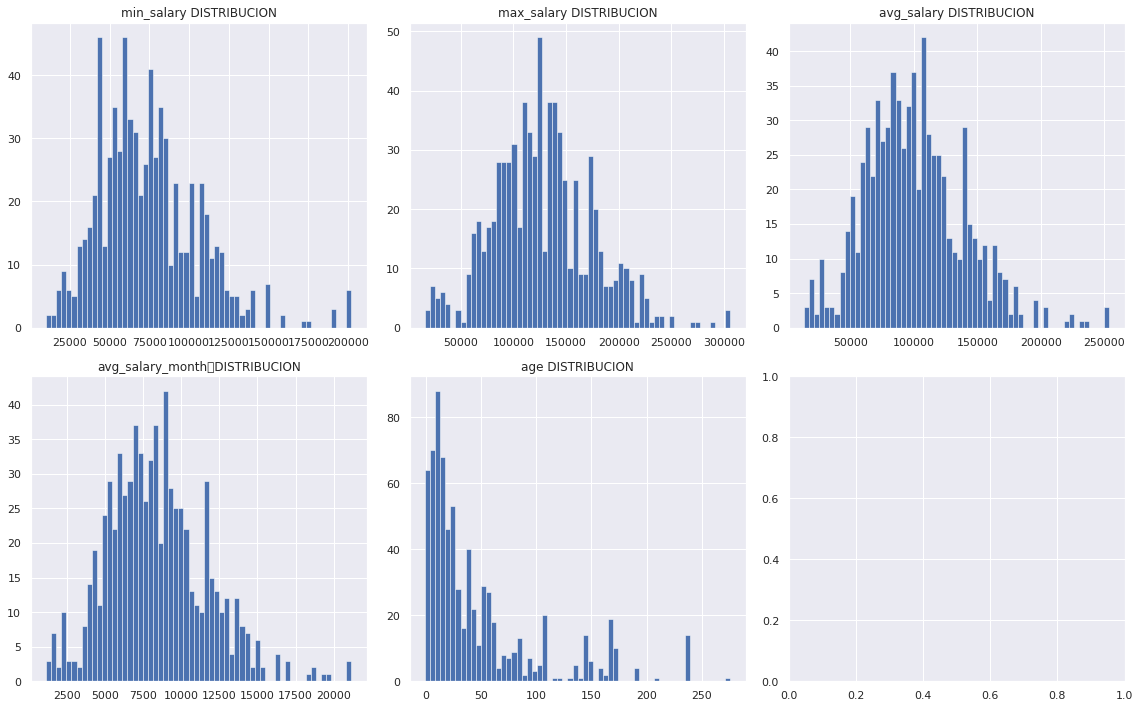

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))

axes[0,0].hist(df1['min_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("min_salary DISTRIBUCION");

axes[0,1].hist(df1['max_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("max_salary DISTRIBUCION");

axes[0,2].hist(df1['avg_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("avg_salary DISTRIBUCION");

axes[1,0].hist(df1['avg_salary_month'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("avg_salary_month	DISTRIBUCION");

axes[1,1].hist(df1['age'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("age DISTRIBUCION");

plt.tight_layout()

In [ ]:
print(df1.dtypes)
print(df1.columns)

Job Title             object
Rating               float64
job_state             object
Type of ownership     object
Industry              object
Sector                object
min_salary             int64
max_salary             int64
avg_salary           float64
avg_salary_month     float64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
Competitors           object
same_state             int64
hourly                 int64
employer_provided      int64
dtype: object
Index(['Job Title', 'Rating', 'job_state', 'Type of ownership', 'Industry',
       'Sector', 'min_salary', 'max_salary', 'avg_salary', 'avg_salary_month',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Competitors',
       'same_state', 'hourly', 'employer_provided'],
      dtype='object')


In [ ]:
df2=df1[['min_salary', 'max_salary','avg_salary', 'avg_salary_month','age']]

In [ ]:
def detect_outliers(df_out,n,features):

  outlier_indices = []
  for col in features:
      #25%
      Q1 = np.percentile(df2[col], 25)
      #75%
      Q3 = np.percentile(df2[col],75)
      #IQR
      IQR = Q3 - Q1
      outlier_step = 1.5 * IQR
      outlier_list_col = df2[(df_out[col] < Q1 - outlier_step) | (df2[col] > Q3 + outlier_step )].index
      outlier_indices.extend(outlier_list_col)
        
    #observaciones con más de 2 valores atípicos
  outlier_indices = Counter(outlier_indices)        
  multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
  return multiple_outliers   
      #Outliers
Outliers_IQR = detect_outliers(df2,2,['min_salary', 'max_salary','avg_salary', 'avg_salary_month','age'])
      #Drop outliers
df_out= df2.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

In [ ]:
print(df2.shape)
print(df_out.shape)
print('total atipicos eliminados: ', len(df2)-len(df_out))


(742, 5)
(731, 5)
total atipicos eliminados:  11


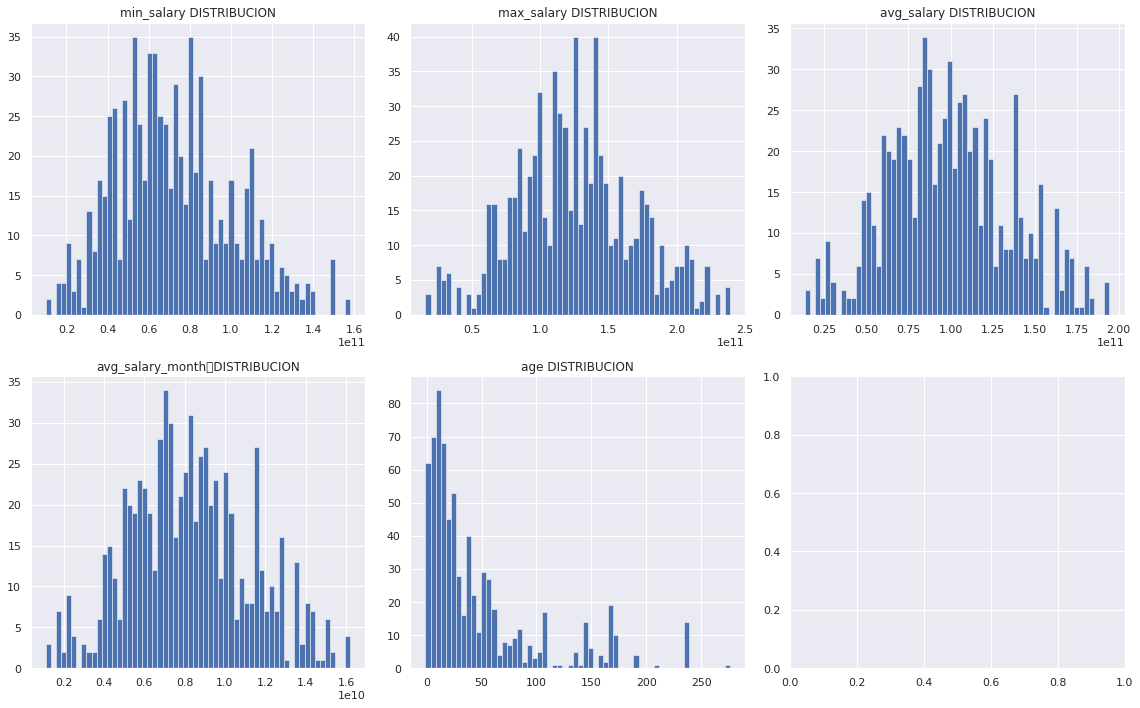

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))

axes[0,0].hist(df_out['min_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,0].set_title("min_salary DISTRIBUCION");

axes[0,1].hist(df_out['max_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,1].set_title("max_salary DISTRIBUCION");

axes[0,2].hist(df_out['avg_salary'], bins=60, linewidth=0.5, edgecolor="white")
axes[0,2].set_title("avg_salary DISTRIBUCION");

axes[1,0].hist(df_out['avg_salary_month'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,0].set_title("avg_salary_month	DISTRIBUCION");

axes[1,1].hist(df_out['age'], bins=60, linewidth=0.5, edgecolor="white")
axes[1,1].set_title("age DISTRIBUCION");

plt.tight_layout()

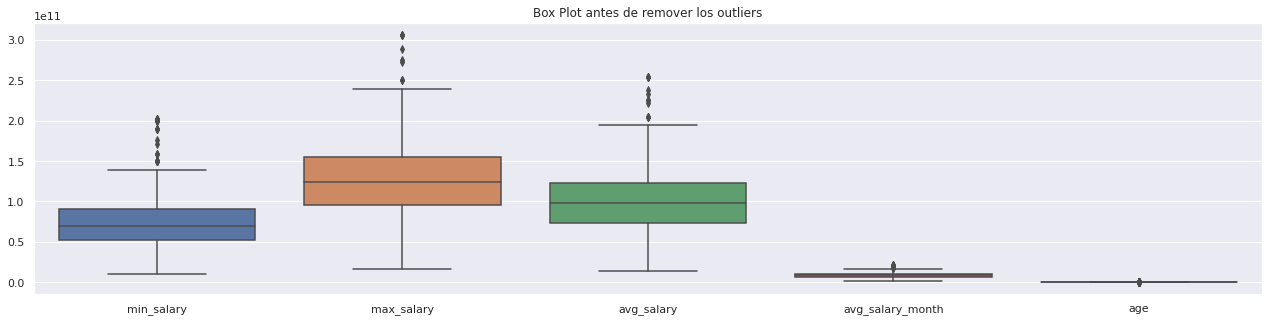

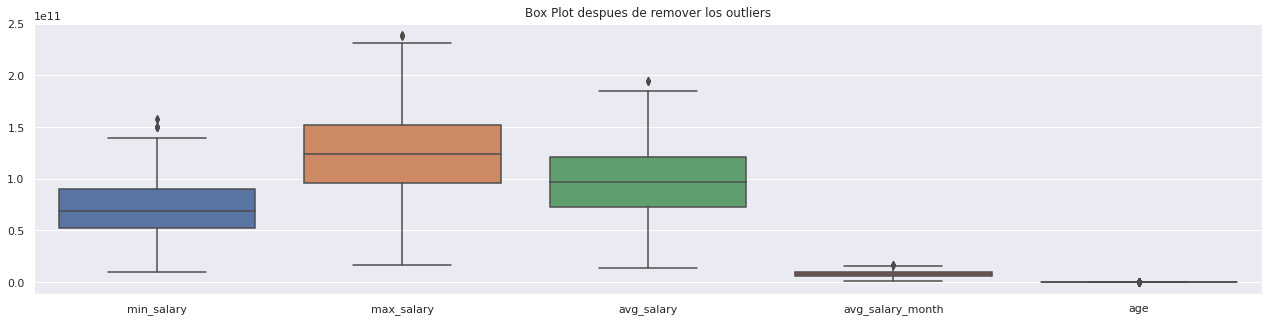

In [ ]:
plt.figure(figsize=(22,5))
sns.boxplot(data=df2)
plt.title("Box Plot antes de remover los outliers")
plt.show()
plt.figure(figsize=(22,5))
sns.boxplot(data=df_out)
plt.title("Box Plot despues de remover los outliers")
plt.show()

# EDA **Visualization of data by groups (estates)**

**Choropleth map interactive of workers by state**

In [ ]:
fig = px.choropleth(height = 600, width = 600,
    locations=df1['job_state'].value_counts().index, # Spatial coordinates
    
    locationmode = 'USA-states', # set of locations match entries in locations
    color = df1['job_state'].value_counts(),
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels= {'color': 'Jobs Frequency'},
    title= 'Jobs per state'
                   )
fig.update_layout(
    geo_scope='usa', # limite map scope to USA,
)
fig.show()

**Choropleth map median annual salary interactive by state**

In [ ]:
fig = px.choropleth(height = 600, width = 600,
    locations= df1.groupby('job_state')['avg_salary'].mean().index, # Spatial coordinates
    locationmode = 'USA-states', # set of locations match entries in locations
    color = df1.groupby('job_state')['avg_salary'].mean(),
    color_continuous_scale=px.colors.sequential.YlOrRd,
    labels= {'color':'$/Year'},
    title= 'Average Salary per state'
                   )
fig.update_layout(
    geo_scope='usa', # limite map scope to USA,
)


**How is the distribution of workers according to average wages?**

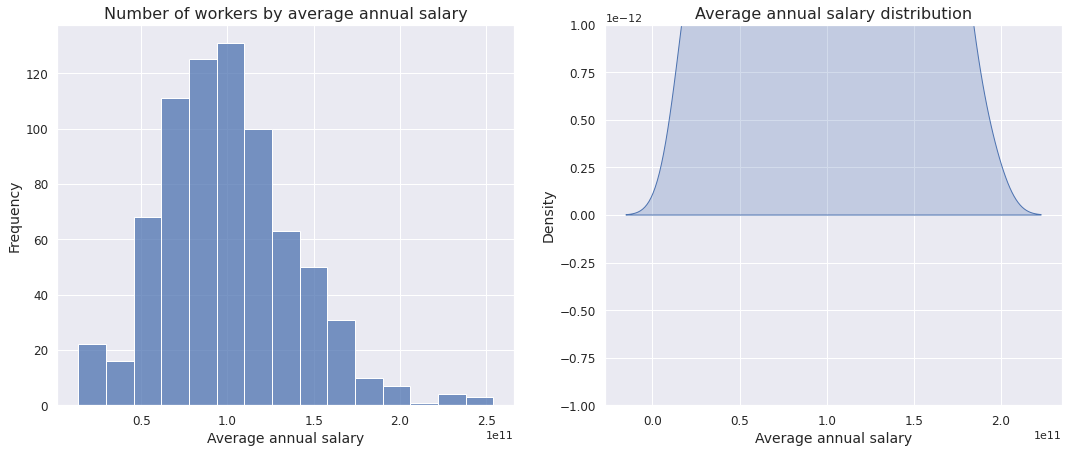

In [ ]:
plt.figure(figsize=(18,7))
plt.subplot(121)
x = df1['avg_salary']
sns.histplot(x, bins=15)
plt.title('Number of workers by average annual salary', fontsize=16)
plt.xlabel('Average annual salary', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Frequency', fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(122)
x = df_out['avg_salary']
sns.kdeplot(x, shade=True)
plt.title('Average annual salary distribution', fontsize=16)
plt.xlabel('Average annual salary', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Density', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

According to the histogram, it is seen that the highest concentration of workers (80%) have an average annual salary of 70k to 125k

**Returning to the interactive maps, the states with the largest number of workers and highest wages are obtained. TOP 9**

In [ ]:
avgsalary_jobstate = df1.groupby('job_state')['avg_salary'].mean().sort_values(ascending= False).head(10).index
avgsalary_jobstate

Index(['CA', 'IL', 'DC', 'Los Angeles', 'MA', 'NJ', 'MI', 'RI', 'NY', 'NC'], dtype='object', name='job_state')

In [ ]:
total_workers= df1['job_state'].value_counts()
total_workers.head(10)

CA    151
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
Name: job_state, dtype: int64

the top of salaries is as follows: 'CA', 'IL', 'DC', 'MA', 'NJ', 'MI', 'RI', 'NY', 'NC'

**Informative square according to the top 9 best paid states, with information on the number of workers with skills in x program, the capacity of each state, and the percentage of workers who know how to use x program**

In [ ]:
prsae1 = df1.groupby('job_state')[['python_yn', 'R_yn','spark','aws','excel']].sum().loc[['CA', 'IL', 'DC', 'MA', 'NJ', 'MI', 'RI', 'NY', 'NC'], :].reset_index()
prsae2 = df1.groupby('job_state')[['avg_salary']].mean().loc[['CA', 'IL', 'DC', 'MA', 'NJ', 'MI', 'RI', 'NY', 'NC'], :].reset_index()
prsae2 = prsae2 ['avg_salary']
Prsae = pd.concat([prsae1, prsae2],axis=1)
Prsae['total_workers'] = 151,40,11,103,17,6,1,72,21
Prsae['capacity'] = (prsae1['python_yn'] + prsae1['R_yn']+prsae1['spark']+prsae1['aws']+prsae1['excel'])
Prsae['avgcapacitypw'] = (Prsae['capacity'])/ (Prsae['total_workers'])
Prsae['avgcapacity_pythonpw'] = (Prsae['python_yn'] / Prsae['total_workers'])
Prsae['avgcapacity_Rpw'] = (Prsae['R_yn'] / Prsae['total_workers'])
Prsae['avgcapacity_sparkpw'] = (Prsae['spark'] / Prsae['total_workers'])
Prsae['avgcapacity_awspw'] = (Prsae['aws'] / Prsae['total_workers'])
Prsae['avgcapacity_excelpw'] = (Prsae['excel'] / Prsae['total_workers'])
Prsae=Prsae.round({'avgcapacitypw':2})
Prsae=Prsae.round({'avgcapacity_pythonpw':2})
Prsae=Prsae.round({'avgcapacity_Rpw':3})
Prsae=Prsae.round({'avgcapacity_sparkpw':2})
Prsae=Prsae.round({'avgcapacity_awspw':2})
Prsae=Prsae.round({'avgcapacity_excelpw':2})
Prsae['avg_salary']=Prsae['avg_salary'].astype(int64)
Prsae

,job_state,python_yn,R_yn,spark,aws,excel,avg_salary,total_workers,capacity,avgcapacitypw,avgcapacity_pythonpw,avgcapacity_Rpw,avgcapacity_sparkpw,avgcapacity_awspw,avgcapacity_excelpw
0,CA,92,1,50,41,84,123619205298,151,268,1.77,0.61,0.01,0.33,0.27,0.56
1,IL,28,0,9,10,17,116662500000,40,64,1.60,0.70,0.00,0.22,0.25,0.42
2,DC,4,0,3,5,8,110181818181,11,20,1.82,0.36,0.00,0.27,0.45,0.73
3,MA,41,0,22,19,58,106281553398,103,140,1.36,0.40,0.00,0.21,0.18,0.56
4,NJ,9,0,0,5,14,104558823529,17,28,1.65,0.53,0.00,0.00,0.29,0.82
5,MI,3,0,1,1,4,100250000000,6,9,1.50,0.50,0.00,0.17,0.17,0.67
6,RI,0,0,0,1,0,100000000000,1,1,1.00,0.00,0.00,0.00,1.00,0.00
7,NY,48,0,19,20,39,98652777777,72,126,1.75,0.67,0.00,0.26,0.28,0.54
8,NC,8,0,7,4,15,98452380952,21,34,1.62,0.38,0.00,0.33,0.19,0.71


Example analysis:
In california, there are a total of 151 workers with an average annual salary of 120k, it has a capacity of 268. 92 workers know python, 1 R , 50 spark, 41 aws and 84 excel.
Of 151, 61% use python, 56% excel, etc.

**TOP 9 states with the highest salaries and the number of workers with knowledge in x program**

In [ ]:
fig = px.bar(data_frame=prsae1, x= "job_state", y=['python_yn', 'R_yn', 'spark', 'aws', 'excel'], barmode= "group")
fig.update_layout(xaxis_title="Highest Salary States", yaxis_title="Programing skill required", title = 'Top 9 States Salary x Skills Required')
fig.show()